## 1. Importing libraries and data

In [113]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## 2. Find a data set to work and import

In [114]:
# Configure API key, Get Data, and Check
# Czech Republic, Particulates (Pm2.5)
quandl.ApiConfig.api_key = 'zprGqsM8frRyLSyzNpgb'
df = quandl.get('OECD/AIR_EMISSIONS_PM2_5_MISC_AGR_CZE')

### I selected the time series data of the Czech Republic air particulates (Pm2.5). I have the same column in my previous data set. This will allow me to do boarder research on this topic because I already know that there is a high collaration between Air Quality Index and PM2.5.

In [115]:
df.head(10)

,Value
Date,
1990-12-31,0.995
1991-12-31,1.010
1992-12-31,0.910
1993-12-31,0.867
1994-12-31,0.824
1995-12-31,0.804
1996-12-31,0.803
1997-12-31,0.804
1998-12-31,0.792


In [116]:
df.shape

(31, 1)

In [117]:
df.columns

Index(['Value'], dtype='object')

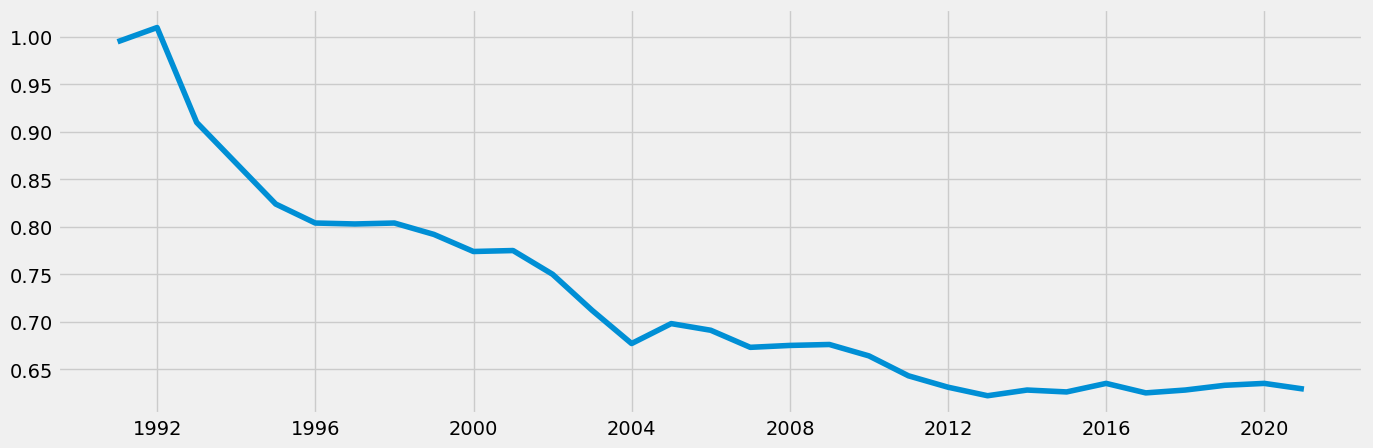

In [118]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

#### I see that the PM2.5 value did a break in 1992 and continued with a decline trend. I decide investigating decline trend after 1992.

## 3. Make a subset of your data set

In [119]:
# Cleaning Data
df_sub = df.reset_index()

In [120]:
df_sub.head()

,Date,Value
0,1990-12-31,0.995
1,1991-12-31,1.010
2,1992-12-31,0.910
3,1993-12-31,0.867
4,1994-12-31,0.824


In [121]:
# Fetch only after 1992 as I want to investigate the decline trend.
df_sub = df_sub.loc[(df_sub['Date'] >= '1992-12-31')]

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Date'], axis=1, inplace=True)
df_sub.head()

,Value
datetime,
1992-12-31,0.910
1993-12-31,0.867
1994-12-31,0.824
1995-12-31,0.804
1996-12-31,0.803


### 3.1 I see that the PM2.5 value did a break in 1992 and continued with a decline trend. I decide investigating decline trend after 1992.

## 4. Create a line chart of your data.

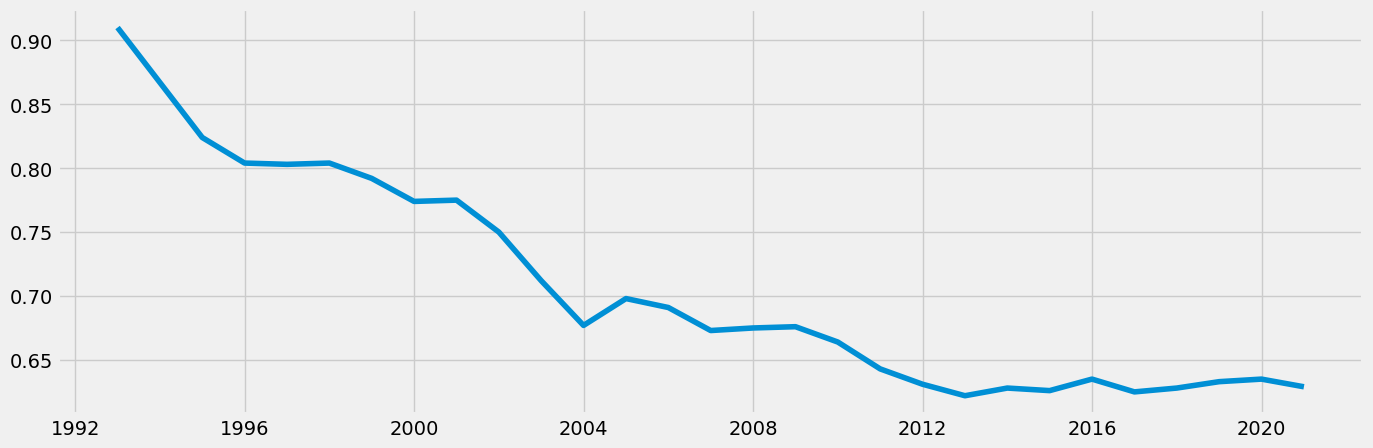

In [122]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

## 5. Decompose the data’s components

In [123]:
# Time series anaysis
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

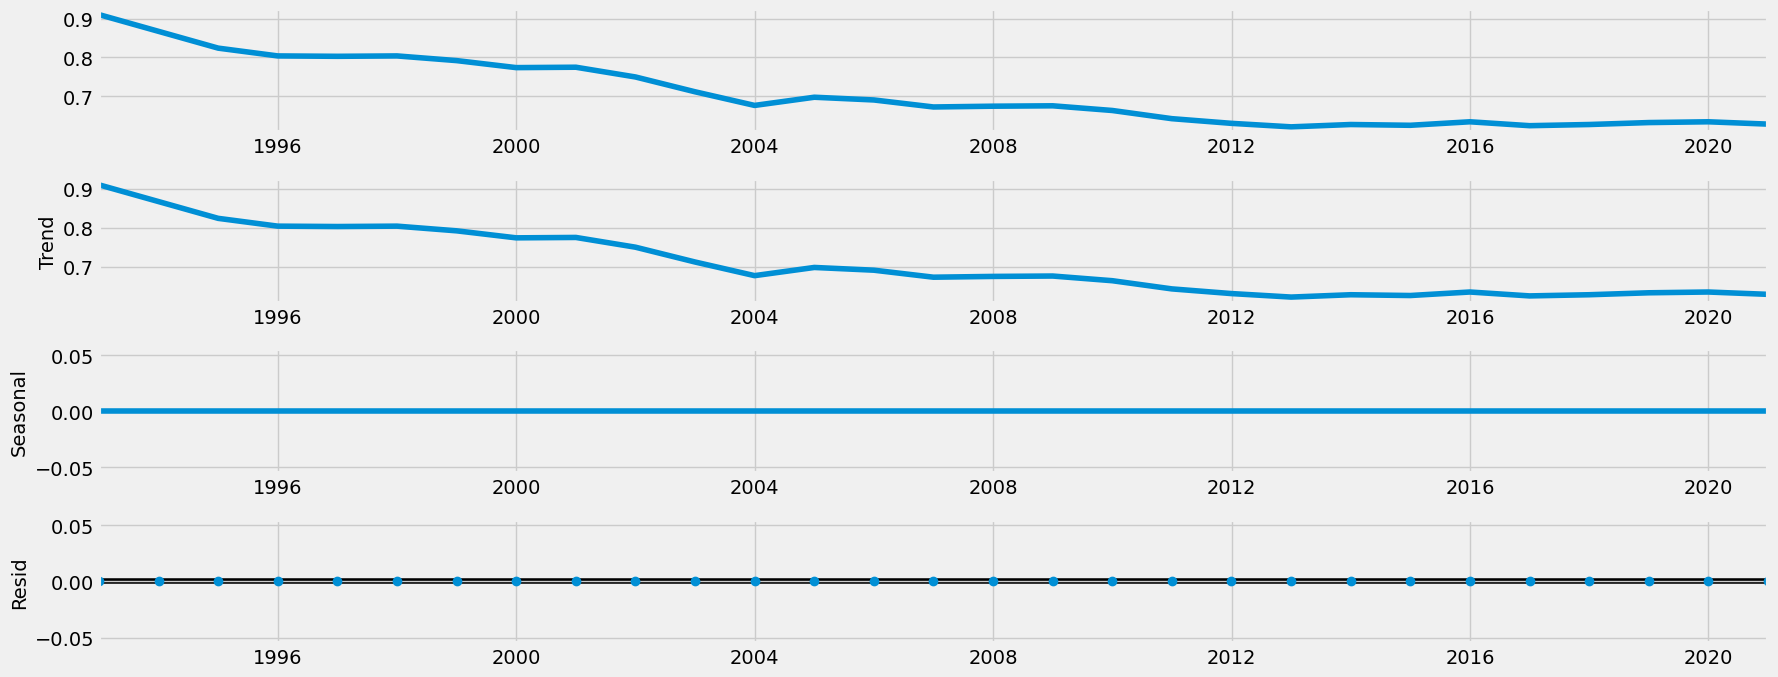

In [124]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

### 5.1  The time series is smooth for the most part (yearly frequency). I only see that, the trend tried be broken and go up at 2004, but it started to decrees againg after couple of years before 2008. 

### The seasonality line is flat because there is no seasonality component in the time series.

## 6. Conduct a Dickey-Fuller test

### hypotheses:
#### Null hypothesis: The data is non-stationary
#### Alternative hypothesis: The data is stationary

In [125]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.756710
p-value                         0.003383
Number of Lags Used             0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


### 6.1 Results:
#### For a "significant result", the p-value should be less than 0,05, and the p-value is 0.003 which is significant!
#### Test Statistic value (-3.7) is less than the Critical Value (5%) with -0,78 and Critival Value (1%) 0,067. I reject the Null hypothesis as theTest statistic value smaller than the Critical Value. So according to the test I can reject the Null hypothsis and my time series is stationary. 

## 9. Check autocorrelations.

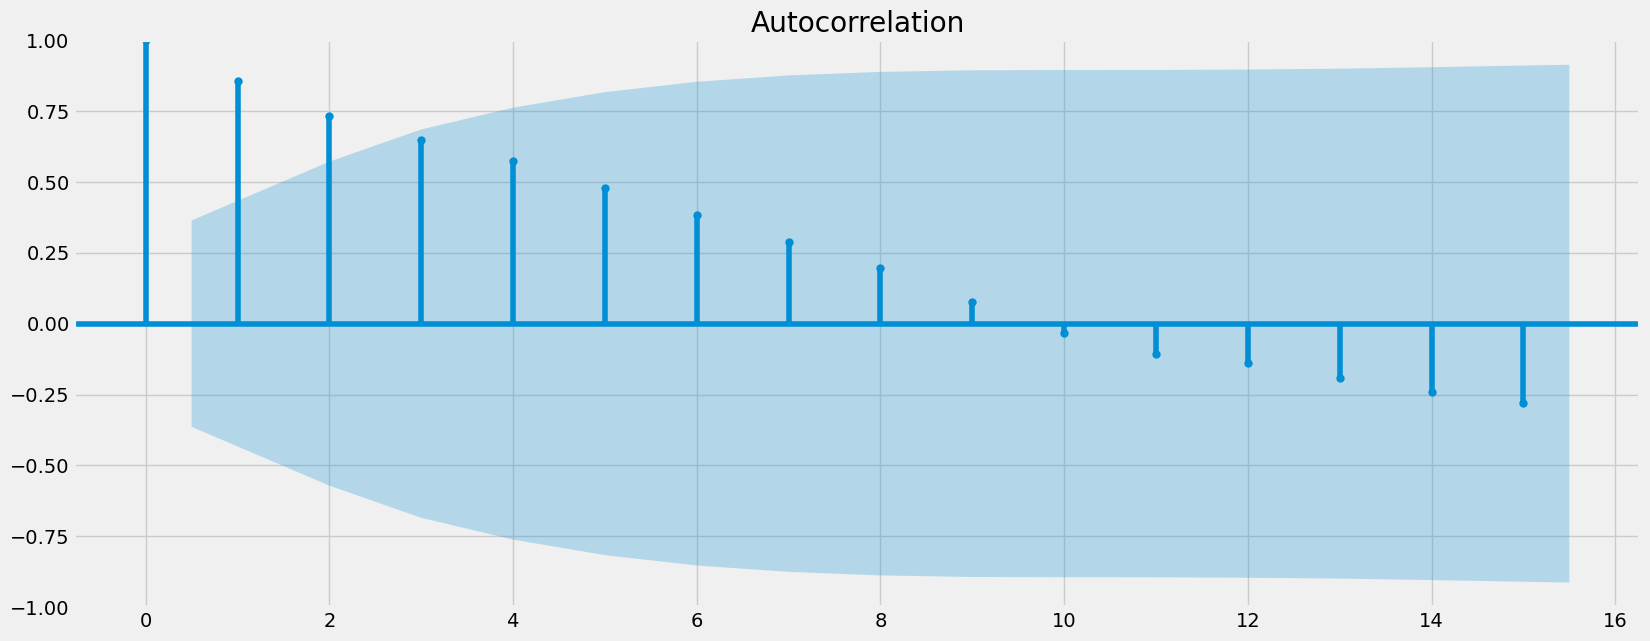

In [126]:
 # Autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub)
plt.show()